In [10]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


In [2]:
from __future__ import print_function
import tensorflow as tf

## 数据集的产生
这是一个线性回归的问题，我们通过$ y=x^2-0.5 $来产生数据集。同时会为产生的数据增加一些随机噪声。

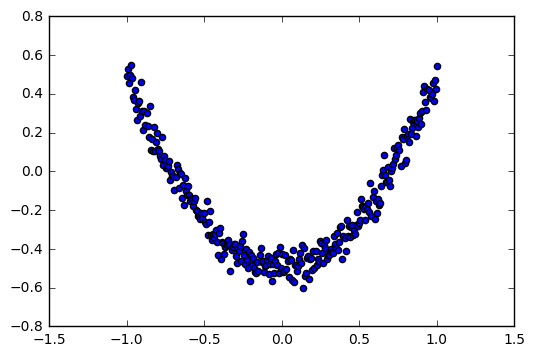

In [3]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

plt.scatter(x_data, y_data)
plt.show()

## 定义全连接层

In [4]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 定义模型
我们使用的事MLP来构建回归模型。MLP就是由多层** 全连接层 **（fully connected layer）组成的神经网络结构。

In [12]:
# 给模型的输入构建占位符placeholder，因为我们需要将模型根据X的预测值和真实值Y进行比较，所以分别需要给X，Y分配占位符。
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# 增加隐藏层
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# 增加输出层
prediction = add_layer(l1, 10, 1, activation_function=None)

# 计算损失函数
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
# 使用梯度下降法来优化参数
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
# 开启session
sess = tf.Session()
# 如果tensorflow的版本大于0.12，tf.initialize_all_variables() 这个方法就不存在了
# 得使用tf.global_variables_initializer()
if int((tf.__version__).split('.')[1]) < 12:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

## 训练

In [6]:
#for i in range(1000):
#    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
#    if i % 50 == 0:
#        # 每50步打印一下损失函数的值。通过损失函数的值来观测模型的好坏。
#        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.20658
0.00561565
0.00455463
0.00417226
0.00394809
0.00379766
0.00367928
0.00358436
0.00351122
0.0034429
0.00338113
0.00332601
0.00327659
0.00323509
0.00319836
0.00316128
0.00313086
0.00310231
0.00307938
0.0030547


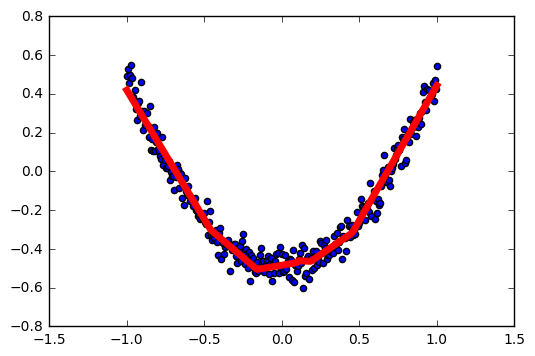

In [13]:
#这段代码会动态的展示训练过程。红线代表预测值，散点是我们产生的数据集。
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()


for i in range(1000):
    # 训练
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # 画出预测值曲线
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(1)